# 3.5 Multiclass Classification

Here we will use several well known classifiers: Support Vector Machine, k-nearest neighbors, and Random Forest.

We will practice with the MNIST data set. It is a data set of images of handwritten numbers.

In [1]:
import numpy as np
from sklearn.datasets import load_digits,fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

The data is vector of floats. The target is an integer that is the attribute of the data. How are the data balanced between the classes? How many samples are there per class?

In [3]:
# explore data type
data,y = digits["data"].copy(),digits["target"].copy()
print(type(data[0][:]),type(y[0]))
# note that we do not modify the raw data that is stored on the digits dictionary.

<class 'numpy.ndarray'> <class 'numpy.int64'>


 **how many classes are there?**
 Since the classes are integers, we can count the number of classes using the function "unique"

In [3]:
Nclasses = len(np.unique(y))
print(np.unique(y))
print(Nclasses)

[0 1 2 3 4 5 6 7 8 9]
10


### 3.1 Data preparation
First print and plot the data.

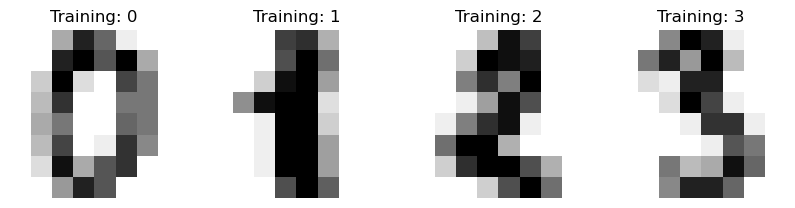

In [4]:
# plot the data
import matplotlib.pyplot as plt
# plot the first 4 data and their labels.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [8]:
digits.data.shape

(1797, 64)

### 3.2 Data re-scaling

We could use MinMaxScaler from ``sklearn.preprocessing`` but since the formula for that is (x-min)/(max-min) and our min is 0, we could directly calculate x/max.

The raw data is still stored in the dictionary ``digits`` and so we can modify the ``data`` variable in place.

additional tutorials [here](!https://www.kaggle.com/recepinanc/mnist-classification-sklearn)


In [4]:
print(min(data[0]),max(data[0]))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array
print(type(newdata))
print(newdata)

0.0 15.0
<class 'numpy.ndarray'>
[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


In [5]:

newdata.shape

(1797, 64)

### 3.3 Train-test split

In [9]:
# Split data into 50% train and 50% test subsets
from sklearn.model_selection import train_test_split
print(f"There are {data.shape[0]} data samples")
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.2, shuffle=False)


There are 1797 data samples


In [10]:
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine classifier
clf = SVC(gamma=0.001) # model design
clf.fit(X_train, y_train) # learn
svc_prediction = clf.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

# K-nearest Neighbors
knn_clf = KNeighborsClassifier() # model design
knn_clf.fit(X_train, y_train) # learn
knn_prediction = knn_clf.predict(X_test) # predict on test
print("K-nearest Neighbors Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=knn_prediction))

# Random Forest
rf_clf = RandomForestClassifier(random_state=42, verbose=True) # model design
rf_clf.fit(X_train, y_train)# learn
rf_prediction = rf_clf.predict(X_test) # predict on test
print("Random Forest Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=rf_prediction))

SVC Accuracy: 0.9583333333333334
K-nearest Neighbors Accuracy: 0.9638888888888889
Random Forest Accuracy: 0.9222222222222223


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [15]:
print(X_test.shape,rf_prediction.shape)

(360, 64) (360,)


In [17]:
ind = np.where(y_test!=rf_prediction)
print(ind)

(array([ 31,  58,  77, 115, 116, 134, 136, 144, 145, 156, 165, 168, 169,
       174, 191, 196, 221, 223, 225, 229, 243, 253, 255, 289, 290, 292,
       328, 353]),)


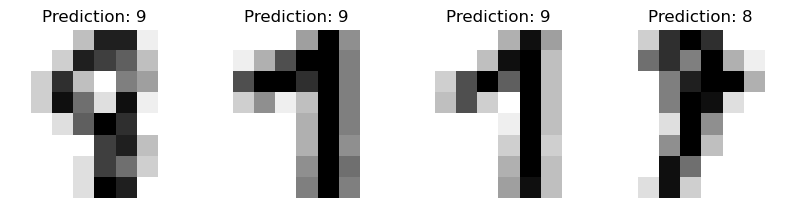

In [18]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test[ind], rf_prediction[ind]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Support Vector Machine
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




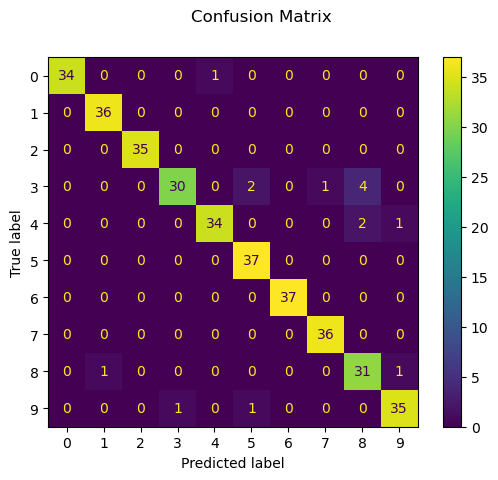

In [19]:
print("Support Vector Machine")
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, svc_prediction)}\n")

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

K-nearest neighbors
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        36
           2       0.97      1.00      0.99        35
           3       0.97      0.89      0.93        37
           4       0.97      0.95      0.96        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.92      1.00      0.96        36
           8       0.94      0.91      0.92        33
           9       1.00      0.92      0.96        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360




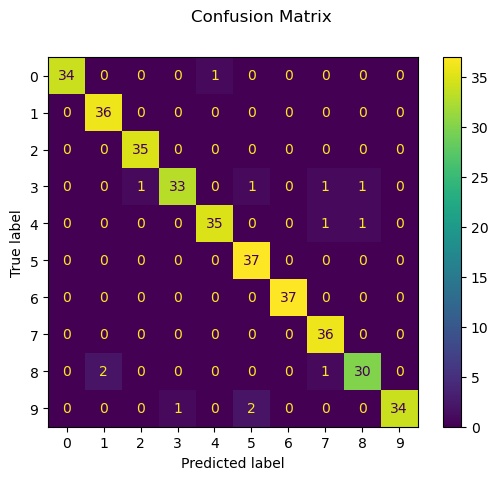

In [20]:
print("K-nearest neighbors")
print(f"Classification report for classifier {knn_clf}:\n"
      f"{metrics.classification_report(y_test, knn_prediction)}\n")
disp = ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Random Forest
Classification report for classifier RandomForestClassifier(random_state=42, verbose=True):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.94      0.94      0.94        36
           2       1.00      0.97      0.99        35
           3       1.00      0.76      0.86        37
           4       0.92      0.92      0.92        37
           5       0.88      0.97      0.92        37
           6       1.00      1.00      1.00        37
           7       0.90      0.97      0.93        36
           8       0.73      0.82      0.77        33
           9       0.92      0.89      0.90        37

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


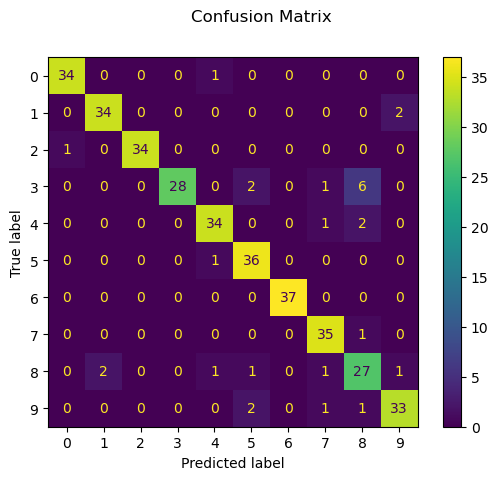

In [21]:
print("Random Forest")
print(f"Classification report for classifier {rf_clf}:\n"
      f"{metrics.classification_report(y_test, rf_prediction)}\n")
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [12]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

In [23]:
Nclasses = len(np.unique(y_test))

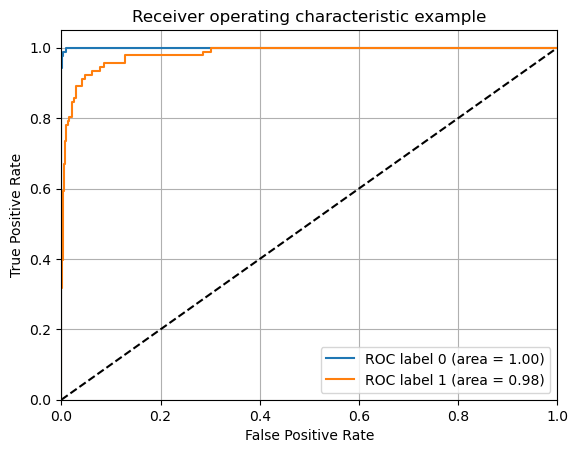

In [24]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm

from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])

X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot of a ROC curve for a specific class
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(Nclasses):
    plt.plot(fpr[i], tpr[i], label='ROC label %1.0f (area = %0.2f)' % (i,roc_auc[i]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [16]:
X_train.shape

(898, 64)

In [17]:
y_train.shape

(898, 10)

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3) # predict using K-fold cross validation

ValueError: y should be a 1d array, got an array of shape (598, 10) instead.